In [1]:
# install datasets
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
# Importation huggingface datatsets
from datasets import load_dataset

Trying out with the mrda dataset


# Identification of Dialogue Acts

In [2]:
# Loading the mrda dataset from silicone for dialogue acts identification
mrda_data_train = load_dataset('silicone', 'mrda', split = 'train').to_pandas()
mrda_data_test = load_dataset('silicone', 'mrda', split = 'test').to_pandas()

Generating train split:   0%|          | 0/83943 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/9815 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/15470 [00:00<?, ? examples/s]

Dataset silicone downloaded and prepared to /Users/serine/.cache/huggingface/datasets/silicone/mrda/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5. Subsequent calls will reuse this data.


Found cached dataset silicone (/Users/serine/.cache/huggingface/datasets/silicone/mrda/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


In [3]:
mrda_data_valid = load_dataset('silicone', 'mrda', split = 'validation').to_pandas()

Found cached dataset silicone (/Users/serine/.cache/huggingface/datasets/silicone/mrda/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

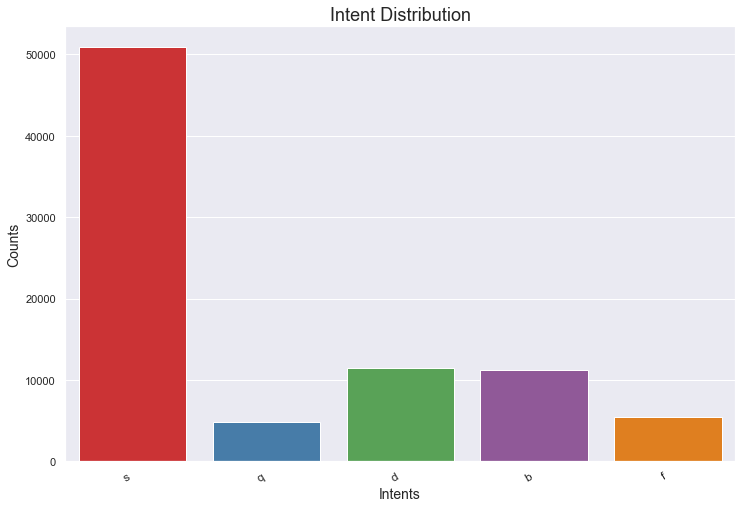

In [5]:
#Plot the Intent Distribution
sns.set()
plt.figure(figsize = (12, 8))
chart = sns.countplot(x = 'Dialogue_Act', data = mrda_data_train, palette='Set1')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 30, horizontalalignment='right', fontweight='light', fontsize='medium')
chart.set_title('Intent Distribution', fontsize = 18)
chart.set_xlabel('Intents', fontsize = 14)
chart.set_ylabel('Counts', fontsize = 14)
plt.show()

There are 5 types of labels : "s" (0) [Statement/Subjective Statement], "d" (1) [Declarative Question], "b" (2) [Backchannel], "f" (3) [Follow-me] or "q" (4) [Question

In [6]:
# The one hot encoding of each 5 labels
from sklearn.preprocessing import LabelBinarizer
ohencoder=LabelBinarizer()
# Training data
trainlabels=mrda_data_train.copy()
trainlabels=trainlabels.pop('Dialogue_Act')
trainlabels=trainlabels.values

validlabels=mrda_data_valid.copy()
validlabels=validlabels.pop('Dialogue_Act')
validlabels=validlabels.values
#Train data
trainlabels=ohencoder.fit_transform(trainlabels)

# Test data
testlabels=ohencoder.transform(mrda_data_test['Dialogue_Act'].values)

# Validation data
validationlabels=ohencoder.transform(validlabels)



In [7]:
mrda_data_train.copy().pop("Dialogue_Act").unique()

array(['s', 'q', 'd', 'b', 'f'], dtype=object)

In [9]:
!pip install tensorflow_text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
#Import of the libraries for modelisation
import tensorflow as tf
import tensorflow as tf

import tensorflow_text
import tensorflow_hub as hub

### Small BERT

In [9]:
bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8' # BERT SMALL 
#bert_model_name = 'small_bert/bert_en_uncased_L-4_H-256_A-4' #BERT MINI
#bert_model_name = 'small_bert/bert_en_uncased_L-8_H-512_A-8' # BERT MEDIUM
#bert_model_name = 'bert_en_uncased_L-12_H-768_A-12' # BERT BASE

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


We are going to use the smaller BERT model : The uncased 4 layers and 512 hidden 8 heads bert model
This model has less layers than the original BERT

Uncased means that the text has been lowercased before WordPiece tokenization

In [10]:
mrda_data_train.columns

Index(['Utterance_ID', 'Dialogue_Act', 'Channel_ID', 'Speaker', 'Dialogue_ID',
       'Utterance', 'Label', 'Idx'],
      dtype='object')

In [11]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)
trainfeatures= mrda_data_train.copy()
trainfeatures.drop(columns=['Utterance_ID', 'Dialogue_Act', 'Channel_ID', 'Speaker', 'Dialogue_ID', 'Label', 'Idx'], inplace = True)

trainfeatures=trainfeatures.values

validfeatures= mrda_data_valid.copy()
validfeatures.drop(columns=['Utterance_ID', 'Dialogue_Act', 'Channel_ID', 'Speaker', 'Dialogue_ID', 'Label', 'Idx'],inplace=True)
validfeatures=validfeatures.values

testfeatures= mrda_data_test.copy()
testfeatures.drop(columns=['Utterance_ID', 'Dialogue_Act', 'Channel_ID', 'Speaker', 'Dialogue_ID', 'Label', 'Idx'],inplace=True)

testfeatures=testfeatures.values

#On one example : preprocessing of the text
text_preprocessed = bert_preprocess_model(trainfeatures[0])

In [16]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)
bert_results = bert_model(text_preprocessed)
print(f'Loaded BERT: {tfhub_handle_encoder}')
print(f'Pooled Outputs Shape:{bert_results["pooled_output"].shape}')
print(f'Pooled Outputs Values:{bert_results["pooled_output"][0, :12]}')
print(f'Sequence Outputs Shape:{bert_results["sequence_output"].shape}')
print(f'Sequence Outputs Values:{bert_results["sequence_output"][0, :12]}')

Loaded BERT: https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Pooled Outputs Shape:(1, 512)
Pooled Outputs Values:[ 0.9997531   0.49351838 -0.19914211 -0.01811161  0.45761594  0.9940561
  0.9996826  -0.9061417  -0.5194521  -0.9984322   0.26582408 -0.99888253]
Sequence Outputs Shape:(1, 128, 512)
Sequence Outputs Values:[[-0.16286062  0.3905133   0.7053189  ... -1.7597705   1.657843
   0.01566771]
 [-0.417506    1.8305593   0.32198444 ... -0.9401635   0.06138715
  -1.0292572 ]
 [ 0.5321959   0.38635293 -1.0754201  ... -0.6525757   0.627221
   0.27437735]
 ...
 [ 0.20238082 -0.26047814  0.263105   ... -0.35762256  1.2536583
   0.17462899]
 [ 0.17434512 -0.3337398   0.5211293  ... -0.39459908  1.3368846
   0.04675635]
 [-0.00255167 -0.17582595  0.5269712  ... -0.51892096  1.3337101
  -0.03165913]]


In [17]:
#Definition of the model
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')

  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(5, activation=None, name='classifier')(net) # for mrda dataset
  
  return tf.keras.Model(text_input, net)



In [18]:
#Building of the model

classifier_model = build_classifier_model()
classifier_model.summary()



Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 preprocessing (KerasLayer)     {'input_type_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128)}                                                  

In [19]:

# Definition of the loss, metrics, number of epochs and optimizer 
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
metrics = tf.metrics.CategoricalAccuracy()
epochs=5
optimizer=tf.keras.optimizers.Adam(1e-5)


In [20]:
#Compilation of the model
classifier_model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)



In [21]:
# Model Training  
print(f'Training model with {tfhub_handle_encoder}')
history = classifier_model.fit(x=trainfeatures,y=trainlabels,
                               validation_data=(validfeatures,validationlabels),
                               batch_size=32,
                               epochs=epochs)



Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Epoch 1/5
2624/2624 [==============================] - 16714s 6s/step - loss: 0.3201 - categorical_accuracy: 0.8836 - val_loss: 0.3193 - val_categorical_accuracy: 0.8818
Epoch 2/5
2624/2624 [==============================] - 7183s 3s/step - loss: 0.2830 - categorical_accuracy: 0.8962 - val_loss: 0.3237 - val_categorical_accuracy: 0.8751
Epoch 3/5
2624/2624 [==============================] - 13843s 5s/step - loss: 0.2780 - categorical_accuracy: 0.8965 - val_loss: 0.3261 - val_categorical_accuracy: 0.8699
Epoch 4/5
2624/2624 [==============================] - 7894s 3s/step - loss: 0.2734 - categorical_accuracy: 0.8970 - val_loss: 0.3111 - val_categorical_accuracy: 0.8761
Epoch 5/5
2624/2624 [==============================] - 8201s 3s/step - loss: 0.2696 - categorical_accuracy: 0.8983 - val_loss: 0.3082 - val_categorical_accuracy: 0.8763


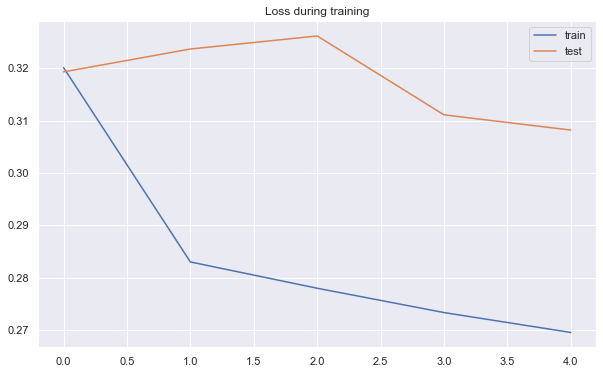

In [22]:
#Plot of loss during training
plt.figure(figsize = (10, 6))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend(['train', 'test'])
plt.title('Loss during training')
plt.show();

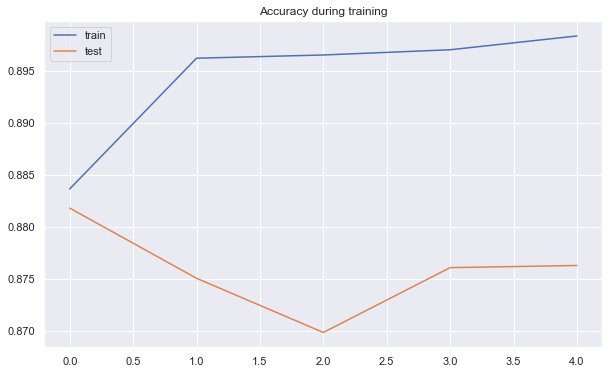

In [23]:
#Plot the accuracy during training
plt.figure(figsize = (10, 6))
plt.plot(history.history['categorical_accuracy'], label = 'train')
plt.plot(history.history['val_categorical_accuracy'], label = 'test')
plt.legend(['train', 'test'])
plt.title('Accuracy during training')
plt.show();

In [24]:
#Evaluation of the model on the test set
#train_loss, train_accuracy = classifier_model.evaluate(trainfeatures, trainlabels)
test_loss, test_accuracy = classifier_model.evaluate(testfeatures, testlabels, batch_size = 16)
#print("train_loss, train_accuracy:", train_accuracy)
print("test_loss, test_accuracy:", test_accuracy)


967/967 [==============================] - 435s 450ms/step - loss: 0.2607 - categorical_accuracy: 0.9000
test_loss, test_accuracy: 0.8999999761581421
